In [1]:
from tobascco import tobascco as tb
from tobascco.sbu import SBU
from rdkit.Chem import AllChem as Chem

In [2]:
options = tb.config.Options()
job = tb.JobHandler(options)
options.overlap_tolerance = 0.0

#### Metal SBU read 

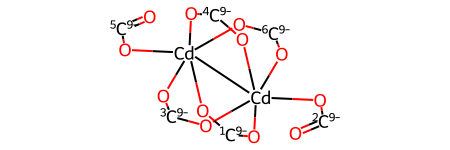

NGLWidget()

In [3]:
m_sbu = SBU()
# Set old_format=True if file was created with 'dummy atoms' indicating SBU connection points. (Xe,Re)
m_sbu.metal_from_file('m45.mol', old_format=True) # old_format has 'Xe' and 'Kr' atoms to represent connection vectors.
m_sbu.identifier = 45 # set sbu.identifier NOT sbu.index. The cif file will not indicate the correct indices otherwise.
display(m_sbu) # flat version of the processed SBU file
view = m_sbu.visualize_sbu() # 3D representation with connection vectors. Requires ASE and nglview modules.
view

#### Organic SBU read

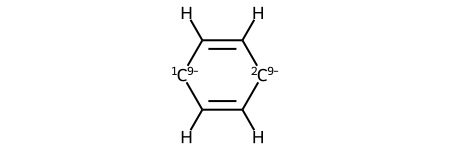

NGLWidget()

In [4]:
o_sbu = SBU()
o_sbu.organic_from_file('o1.mol', old_format=True)
o_sbu.identifier = 1 # set sbu.identifier NOT sbu.index. The cif file will not indicate the correct indices otherwise.
display(o_sbu) # flat version of the processed SBU file. -9 formal charge on carbons represent bonding sites to other SBUs
view = o_sbu.visualize_sbu()
view

#### Read in database files

In [5]:
# old SBU files come with code in the data/sbu folder
job._read_sbu_database_files()
# old net files come with code in the data/arc folder
job._read_topology_database_files()

Build the MOF with the **pcu** topology

In [6]:
struct, net = job._build_structure([m_sbu, o_sbu], 'pcu')

#### visualize the resulting cif file (note bonds are drawn by the visualization program and not read from the cif file)

In [7]:
import nglview as nv  # for visualizing CIF file
struct.write_cif()
view = nv.show_file("{0:s}.cif".format(struct.name))
print("Structure written to {0:s}.cif".format(struct.name))
view.camera = 'orthographic'
view.add_unitcell()
view

Structure written to str_m45_o1_pcu.cif


NGLWidget()